# Check SalishSeaCast_hourly_prod NEMO Configuration

Compare results of a SalishSeaCast (green) production run to one from the `SalishSeaCast_hourly_prod`
that was run on `graham`.

The SalishSeaCast_hourly_prod config is for runs of a version of SalishSeaCast v202111 modified by Tall
for collaboration with Sacchi to compare model results with observation from 22-27 August 2024 near the
northwest end of Texada Island.


In [1]:
import sys
from pathlib import Path

import arrow
import cmocean
import matplotlib.pyplot as plt
import xarray

Python and library versions:

In [2]:
import h5netcdf
import h5py
import matplotlib
import numpy
import pandas

print(f"Python {sys.version=}")
print(f"{numpy.__version__=}")
print(f"{xarray.__version__=}")
print(f"{pandas.__version__=}")
print(f"{h5netcdf.__version__=}")
print(f"{h5py.__version__=}")
print(f"{matplotlib.__version__=}")
print(f"{cmocean.__version__=}")
print(f"{arrow.__version__=}")

Python sys.version='3.13.2 | packaged by conda-forge | (main, Feb 17 2025, 14:10:22) [GCC 13.3.0]'
numpy.__version__='2.2.4'
xarray.__version__='2025.3.1'
pandas.__version__='2.2.3'
h5netcdf.__version__='1.6.1'
h5py.__version__='3.13.0'
matplotlib.__version__='3.10.1'
cmocean.__version__='v3.0.3'
arrow.__version__='1.3.0'


In [3]:
results_paths = {
  "baseline": Path("/results2/SalishSea/nowcast-green.202111/22aug24/"),
  "SSC_hr_prod": Path("/results/SalishSea/SalishSeaCast_hourly_prod/22aug24/"),
}

In [4]:
drop_vars = {
  "nav_lat", "nav_lon",
  "bounds_nav_lat", "bounds_nav_lon",
  "time_centered", "time_centered_bounds", "time_counter_bounds",
  "deptht_bounds", "area",
}

## Salinity Fields Comparison

In [6]:
baseline_ds = xarray.open_dataset(results_paths["baseline"] / "SalishSea_1h_20240822_20240822_grid_T.nc", drop_variables=drop_vars, engine="h5netcdf")

baseline_ds

<xarray.Dataset> Size: 6GB
Dimensions:       (deptht: 40, time_counter: 24, y: 898, x: 398)
Coordinates:
  * deptht        (deptht) float32 160B 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
  * time_counter  (time_counter) datetime64[ns] 192B 2024-08-22T00:30:00 ... ...
Dimensions without coordinates: y, x
Data variables:
    sossheig      (time_counter, y, x) float32 34MB ...
    votemper      (time_counter, deptht, y, x) float32 1GB ...
    vosaline      (time_counter, deptht, y, x) float32 1GB ...
    sigma_theta   (time_counter, deptht, y, x) float32 1GB ...
    e3t           (time_counter, deptht, y, x) float32 1GB ...
Attributes:
    name:         SalishSea_1h_20240822_20240822_grid_T
    description:  physics tracers and VVL layer thicknesses
    title:        physics tracers and VVL layer thicknesses
    Conventions:  CF-1.6
    timeStamp:    2024-Aug-22 17:12:57 GMT
    uuid:         761825f6-2bde-4ab1-9e22-375613272cc9

In [7]:
SSC_hr_prod_ds = xarray.open_dataset(results_paths["SSC_hr_prod"] / "SalishSea_1h_20240822_20240822_grid_T.nc", drop_variables=drop_vars, engine="h5netcdf")

SSC_hr_prod_ds

<xarray.Dataset> Size: 6GB
Dimensions:       (deptht: 40, time_counter: 24, y: 898, x: 398)
Coordinates:
  * deptht        (deptht) float32 160B 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
  * time_counter  (time_counter) datetime64[ns] 192B 2024-08-22T00:30:00 ... ...
Dimensions without coordinates: y, x
Data variables:
    sossheig      (time_counter, y, x) float32 34MB ...
    votemper      (time_counter, deptht, y, x) float32 1GB ...
    vosaline      (time_counter, deptht, y, x) float32 1GB ...
    sigma_theta   (time_counter, deptht, y, x) float32 1GB ...
    e3t           (time_counter, deptht, y, x) float32 1GB ...
Attributes:
    name:         SalishSea_1h_20240822_20240822_grid_T
    description:  physics tracers and VVL layer thicknesses
    title:        physics tracers and VVL layer thicknesses
    Conventions:  CF-1.6
    timeStamp:    2025-Apr-06 11:09:13 GMT
    uuid:         e2656f8e-07a3-49f0-afd5-8f767c3b8439

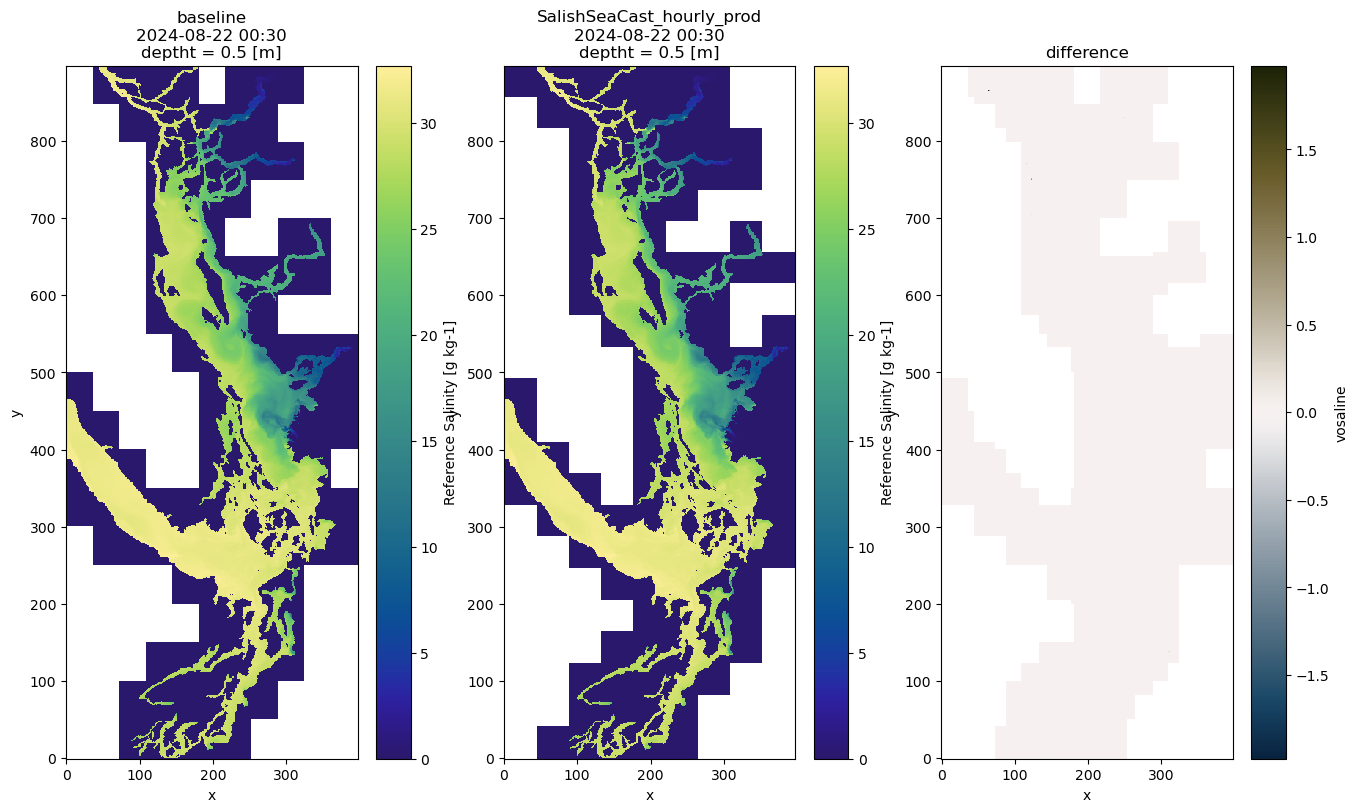

In [9]:
_, (axref, axcomp, axdiff) = plt.subplots(1, 3, figsize=(16, 9))
timestamp = arrow.get(pandas.to_datetime(baseline_ds.time_counter)[0]).format("YYYY-MM-DD HH:mm")

baseline_sal = baseline_ds.vosaline.isel(time_counter=0, deptht=0)
baseline_sal.plot(ax=axref, cmap=cmocean.cm.haline)
axref.set_title(f"baseline\n{timestamp}\n{axref.get_title().split(",")[0]}")

SSC_hr_prod_sal = SSC_hr_prod_ds.vosaline.isel(time_counter=0, deptht=0)
SSC_hr_prod_sal.plot(ax=axcomp, cmap=cmocean.cm.haline)
axcomp.set_title(f"SalishSeaCast_hourly_prod\n{timestamp}\n{axcomp.get_title().split(",")[0]}")

(baseline_sal - SSC_hr_prod_sal).plot(ax=axdiff, cmap=cmocean.cm.diff)
axdiff.set_title("difference");

Nearly identical surface salinity fields indicate that the `SalishSeaCast_hourly_prod` configuration produces essentially the same results
as the production baseline run.
The minor differences are expected because the runs were executed on different compute clusters and with different MPI decompositions.

## Diatoms Fields Comparison

In [10]:
baseline_ds = xarray.open_dataset(results_paths["baseline"] / "SalishSea_1h_20240822_20240822_biol_T.nc", drop_variables=drop_vars, engine="h5netcdf")

baseline_ds

<xarray.Dataset> Size: 14GB
Dimensions:                       (deptht: 40, time_counter: 24, y: 898, x: 398)
Coordinates:
  * deptht                        (deptht) float32 160B 0.5 1.5 ... 414.5 441.5
  * time_counter                  (time_counter) datetime64[ns] 192B 2024-08-...
Dimensions without coordinates: y, x
Data variables:
    nitrate                       (time_counter, deptht, y, x) float32 1GB ...
    ammonium                      (time_counter, deptht, y, x) float32 1GB ...
    silicon                       (time_counter, deptht, y, x) float32 1GB ...
    diatoms                       (time_counter, deptht, y, x) float32 1GB ...
    flagellates                   (time_counter, deptht, y, x) float32 1GB ...
    microzooplankton              (time_counter, deptht, y, x) float32 1GB ...
    dissolved_organic_nitrogen    (time_counter, deptht, y, x) float32 1GB ...
    particulate_organic_nitrogen  (time_counter, deptht, y, x) float32 1GB ...
    biogenic_silicon              (time_counter, deptht, y, x) float32 1GB ...
    mesozooplankton               (time_counter, deptht, y, x) float32 1GB ...
Attributes:
    name:         SalishSea_1h_20240822_20240822_biol_T
    description:  biology
    title:        biology
    Conventions:  CF-1.6
    timeStamp:    2024-Aug-22 17:13:12 GMT
    uuid:         3771b3cc-8d22-4810-ad9a-1924ce75857e

In [11]:
SSC_hr_prod_ds = xarray.open_dataset(results_paths["SSC_hr_prod"] / "SalishSea_1h_20240822_20240822_biol_T.nc", drop_variables=drop_vars, engine="h5netcdf")

SSC_hr_prod_ds

<xarray.Dataset> Size: 14GB
Dimensions:                       (deptht: 40, time_counter: 24, y: 898, x: 398)
Coordinates:
  * deptht                        (deptht) float32 160B 0.5 1.5 ... 414.5 441.5
  * time_counter                  (time_counter) datetime64[ns] 192B 2024-08-...
Dimensions without coordinates: y, x
Data variables:
    nitrate                       (time_counter, deptht, y, x) float32 1GB ...
    ammonium                      (time_counter, deptht, y, x) float32 1GB ...
    silicon                       (time_counter, deptht, y, x) float32 1GB ...
    diatoms                       (time_counter, deptht, y, x) float32 1GB ...
    flagellates                   (time_counter, deptht, y, x) float32 1GB ...
    microzooplankton              (time_counter, deptht, y, x) float32 1GB ...
    dissolved_organic_nitrogen    (time_counter, deptht, y, x) float32 1GB ...
    particulate_organic_nitrogen  (time_counter, deptht, y, x) float32 1GB ...
    biogenic_silicon              (time_counter, deptht, y, x) float32 1GB ...
    mesozooplankton               (time_counter, deptht, y, x) float32 1GB ...
Attributes:
    name:         SalishSea_1h_20240822_20240822_biol_T
    description:  biology
    title:        biology
    Conventions:  CF-1.6
    timeStamp:    2025-Apr-06 11:09:26 GMT
    uuid:         6bf6b845-a7ea-4052-9f9c-69547ca49c58

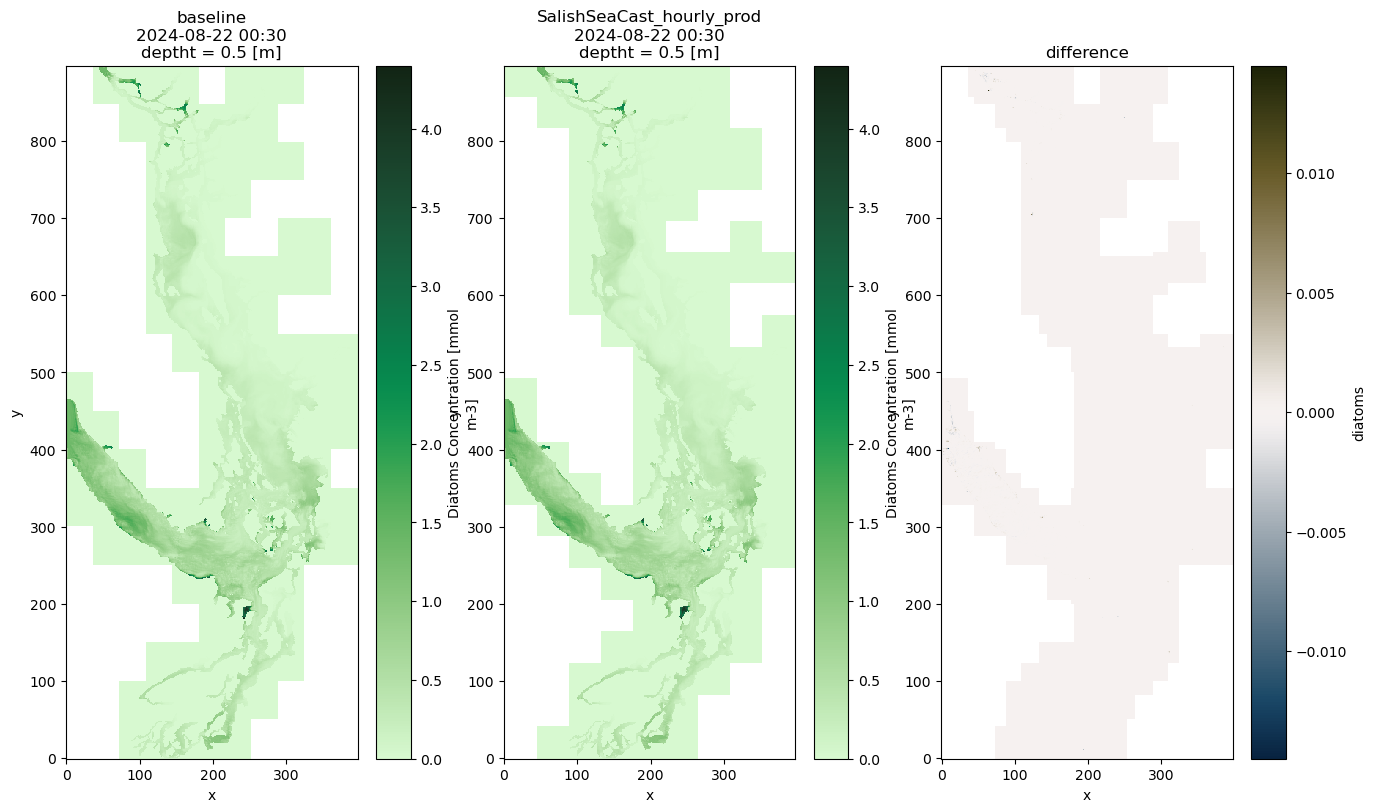

In [13]:
_, (axref, axcomp, axdiff) = plt.subplots(1, 3, figsize=(16, 9))
timestamp = arrow.get(pandas.to_datetime(baseline_ds.time_counter)[0]).format("YYYY-MM-DD HH:mm")

baseline_diatoms = baseline_ds.diatoms.isel(time_counter=0, deptht=0)
baseline_diatoms.plot(ax=axref, cmap=cmocean.cm.algae)
axref.set_title(f"baseline\n{timestamp}\n{axref.get_title().split(",")[0]}")

SSC_hr_prod_diatoms = SSC_hr_prod_ds.diatoms.isel(time_counter=0, deptht=0)
SSC_hr_prod_diatoms.plot(ax=axcomp, cmap=cmocean.cm.algae)
axcomp.set_title(f"SalishSeaCast_hourly_prod\n{timestamp}\n{axcomp.get_title().split(",")[0]}")

(baseline_diatoms - SSC_hr_prod_diatoms).plot(ax=axdiff, cmap=cmocean.cm.diff)
axdiff.set_title("difference");

Nearly identical surface diatoms fields indicate that the `SalishSeaCast_hourly_prod` configuration produces essentially the same results
as the production baseline run.
The minor differences are expected because the runs were executed on different compute clusters and with different MPI decompositions.